In [1]:
import pandas as pd
import numpy as np
from utils_hiaac import (plot_fun_acc,daghar_path,read_csv_data,merge_info)
from check_data import check_quality, plot_fun_t,print_peak_time 


In [2]:
dataset_path_standardized = "/data/views/standardized_balanced/"
dataset_path_reader = "/data/test/reader_output_Hiaac.csv"
dataset_path_raw_balanced = "/data/views/raw_balanced/"
path_out = "data/test/"
MAX_ACC_AMPLITUDE = 70
MAX_F = 97
USER = 7

## Read Dataset after reader

In [3]:
df_all = pd.read_csv(dataset_path_reader)

In [4]:
df = df_all[df_all['user'] == USER]

In [5]:
a = df['accel-x'].values
b = df['accel-y'].values
c = df['accel-z'].values
sensor = np.vstack((a,b,a))
sensor = sensor.transpose()
print(sensor.shape, df['timestamp-server-accel'].shape)

(90000, 3) (90000,)


In [6]:
flag = check_quality(df['accel-x'],df['timestamp-server-accel'],MAX_F,MAX_ACC_AMPLITUDE)
if flag==False:
    peaks = print_peak_time(sensor,df['timestamp-server-accel'].values,(100-MAX_F)*10,"HIAAC",path_out,timestap=True)
    print(f"Peaks:{len(peaks)}")

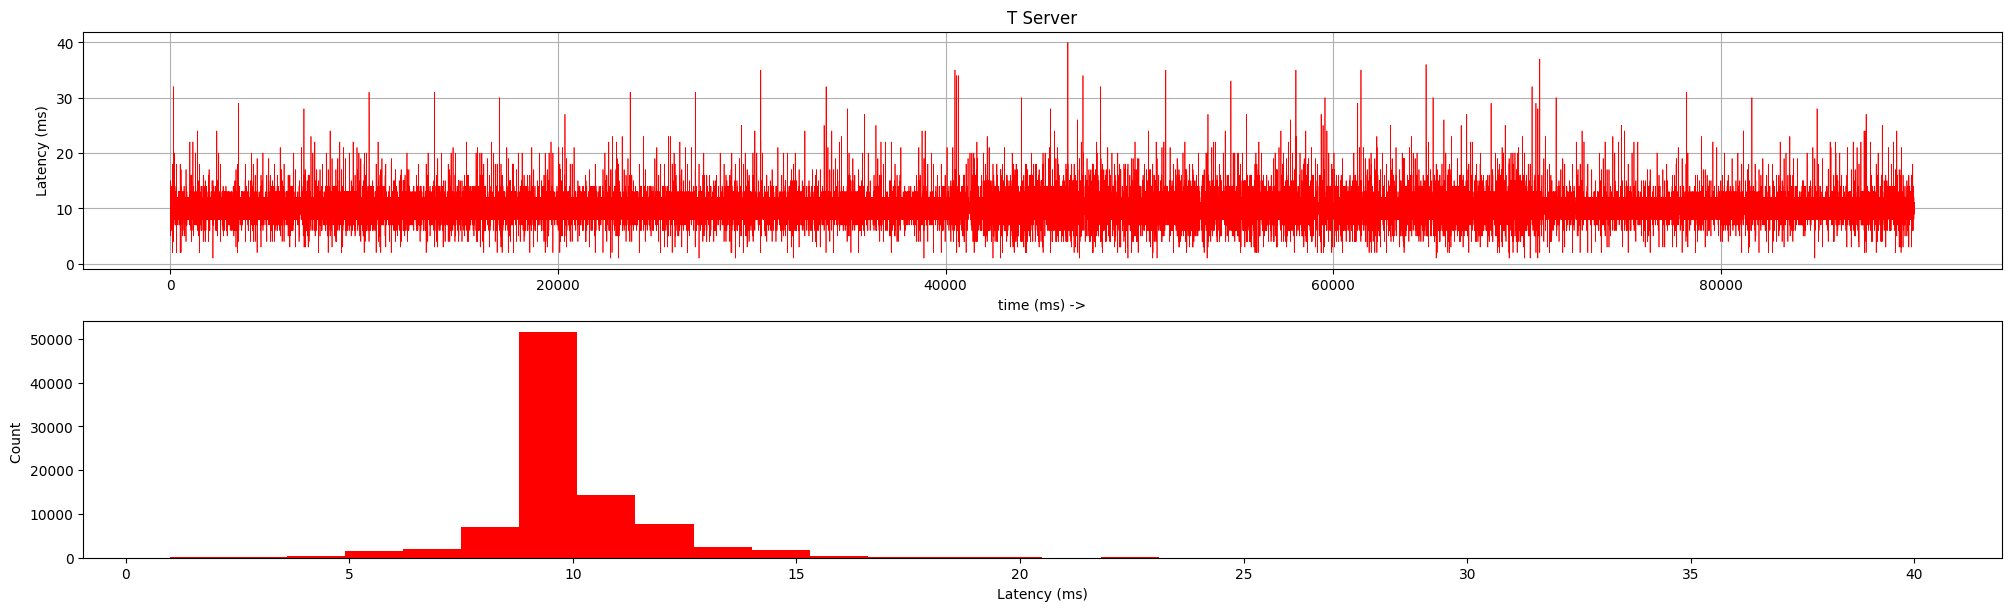

In [7]:
plot_fun_t(df['timestamp-server-accel'].values,False)

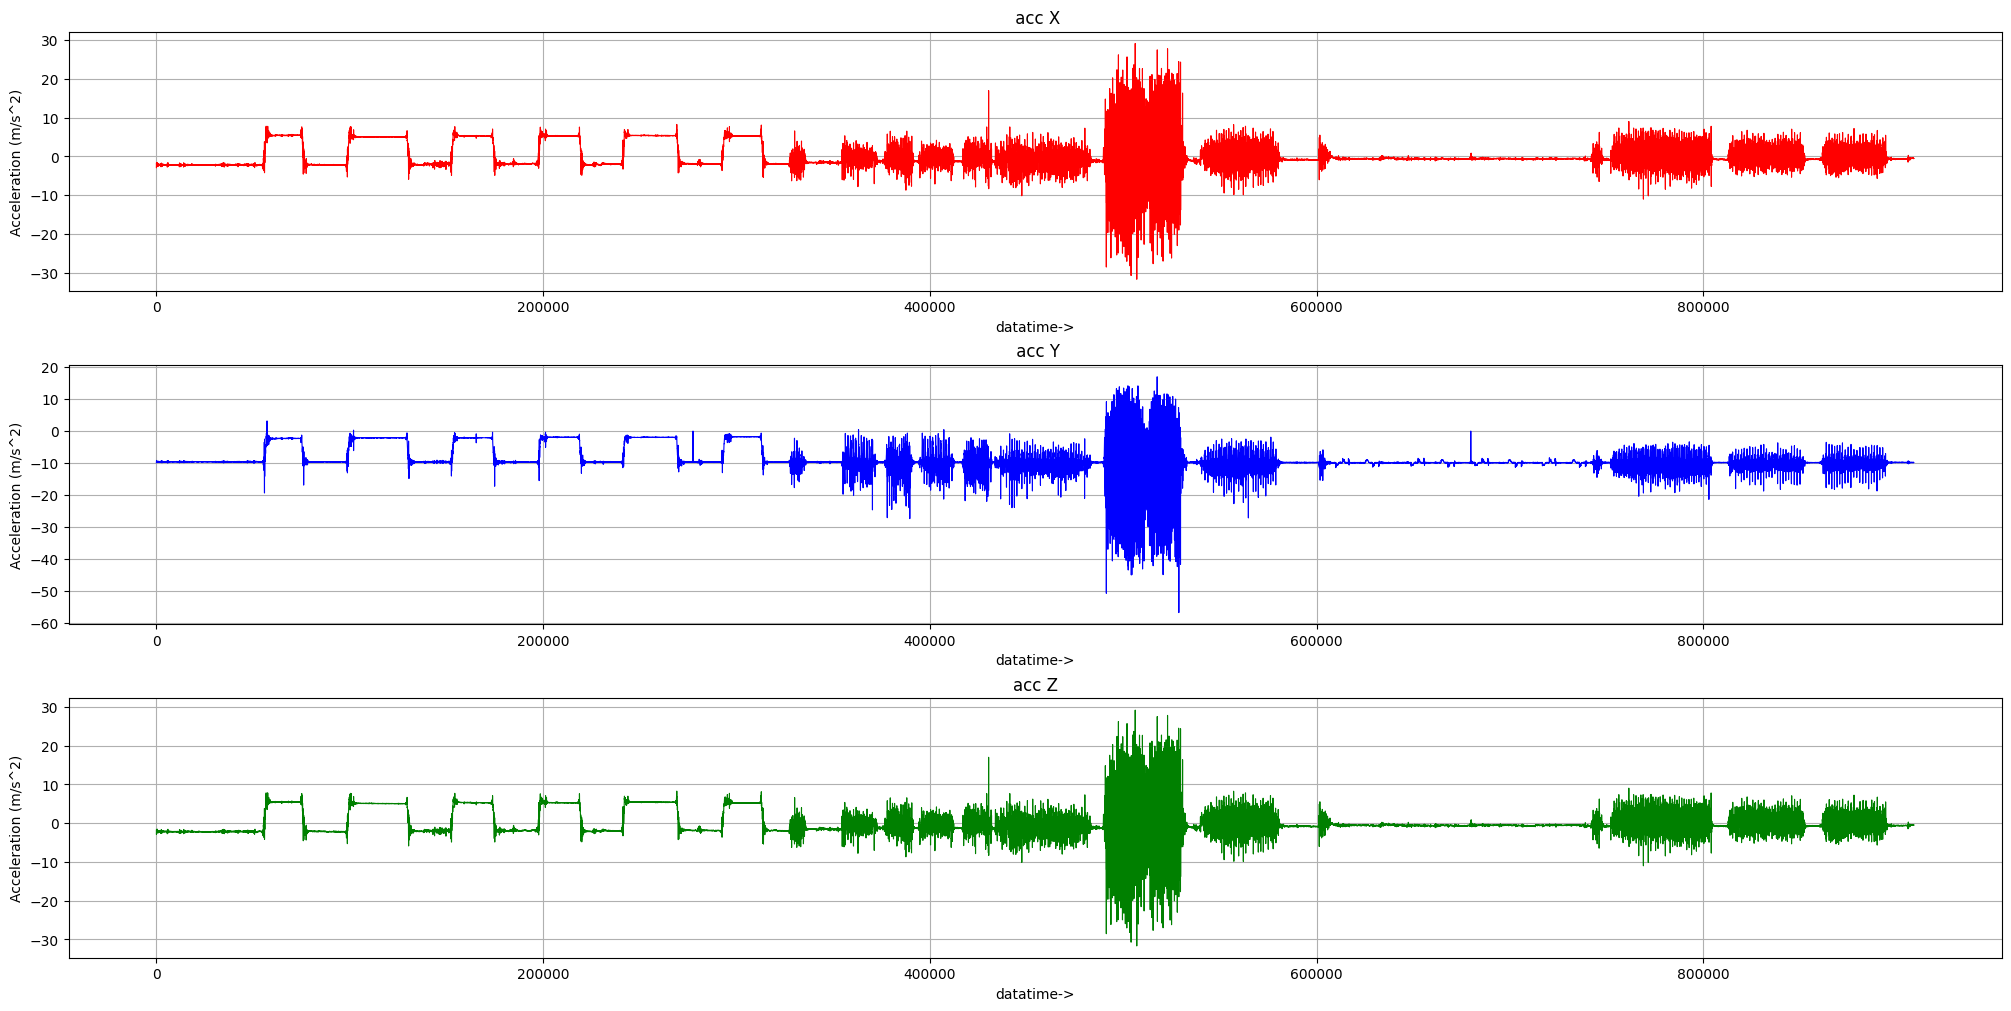

In [8]:
plot_fun_acc(sensor,df['timestamp-server-accel'].values,False)

## Read Dataset baseline 

In [9]:

path = daghar_path(dataset_path_raw_balanced,2,6)
df_all_rb = pd.read_csv(path)
print(df_all_rb.columns)
df = df_all_rb[df_all_rb['user'] == 1]
[accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, standard_activity_code] = read_csv_data(df)

/home/work/maria/DAGHAR/data/views/raw_balanced/HIAAC/test.csv
Index(['accel-x-0', 'accel-x-1', 'accel-x-2', 'accel-x-3', 'accel-x-4',
       'accel-x-5', 'accel-x-6', 'accel-x-7', 'accel-x-8', 'accel-x-9',
       ...
       'gyro-z-298', 'gyro-z-299', 'timestamp-server-accel', 'activity code',
       'trial', 'user', 'timestamp-server-gyro', 'position', 'window',
       'standard activity code'],
      dtype='object', length=1808)


In [10]:
[X,y] = merge_info(accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, standard_activity_code,f=100)
tempo = np.ones(len(y))*10
sensor = np.transpose(X)

(6, 12300) (12300,)


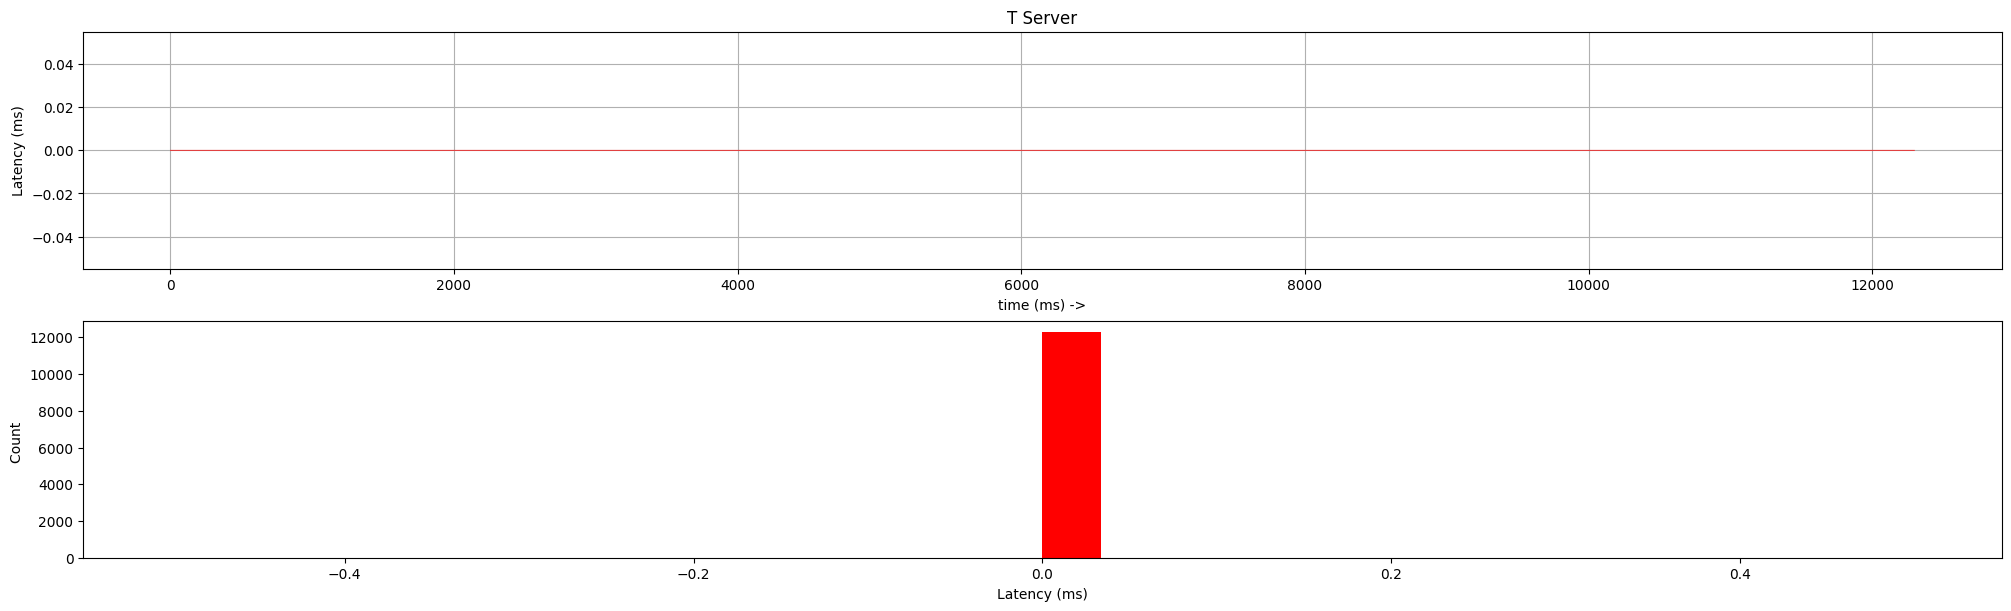

In [11]:
plot_fun_t(tempo,False)

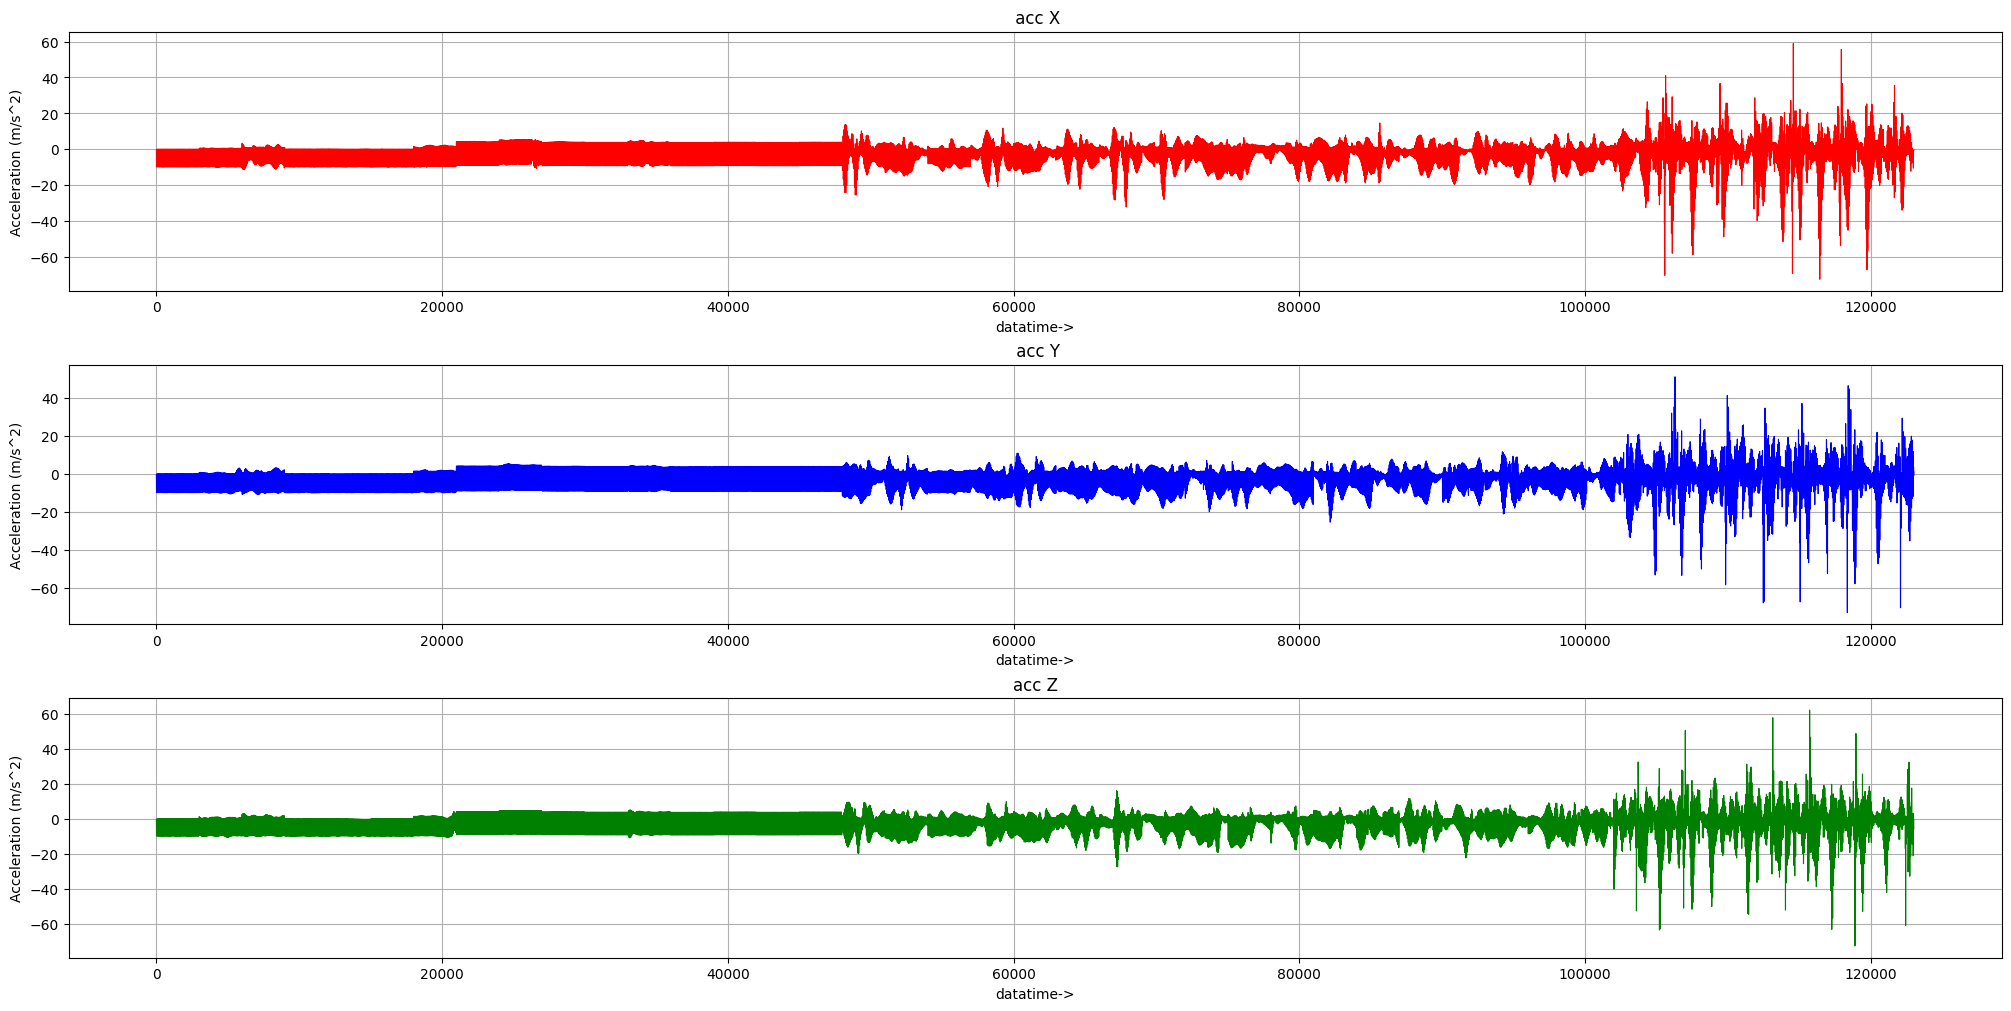

In [12]:
plot_fun_acc(sensor,tempo,True)

## Read Dataset baseline 

In [13]:
path = daghar_path(dataset_path_standardized,2,6)
df_all_rb = pd.read_csv(path)
print(df_all_rb.columns)
df = df_all_rb[df_all_rb['user'] == 1]
[accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, standard_activity_code] = read_csv_data(df)

/home/work/maria/DAGHAR/data/views/standardized_balanced/HIAAC/test.csv
Index(['accel-x-0', 'accel-x-1', 'accel-x-2', 'accel-x-3', 'accel-x-4',
       'accel-x-5', 'accel-x-6', 'accel-x-7', 'accel-x-8', 'accel-x-9',
       ...
       'gyro-z-59', 'timestamp-server-accel', 'activity code', 'trial',
       'index', 'user', 'timestamp-server-gyro', 'position', 'window',
       'standard activity code'],
      dtype='object', length=369)


In [14]:
[X,y] = merge_info(accel_x, accel_y, accel_z, gyro_x, gyro_y, gyro_z, standard_activity_code,f=20)
tempo = np.ones(len(y))*10
sensor = np.transpose(X)

(6, 2460) (2460,)


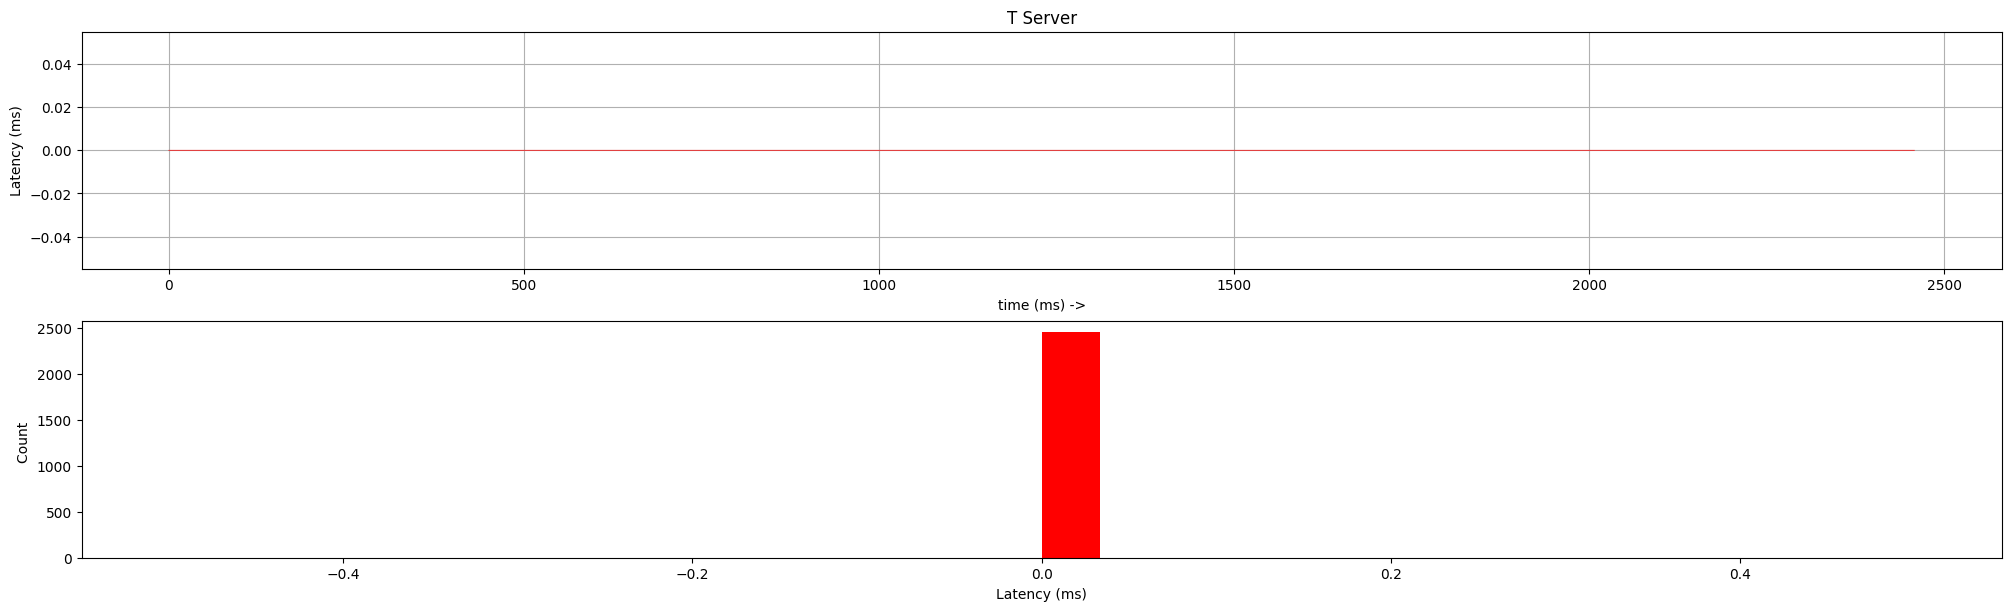

In [15]:
plot_fun_t(tempo,False)

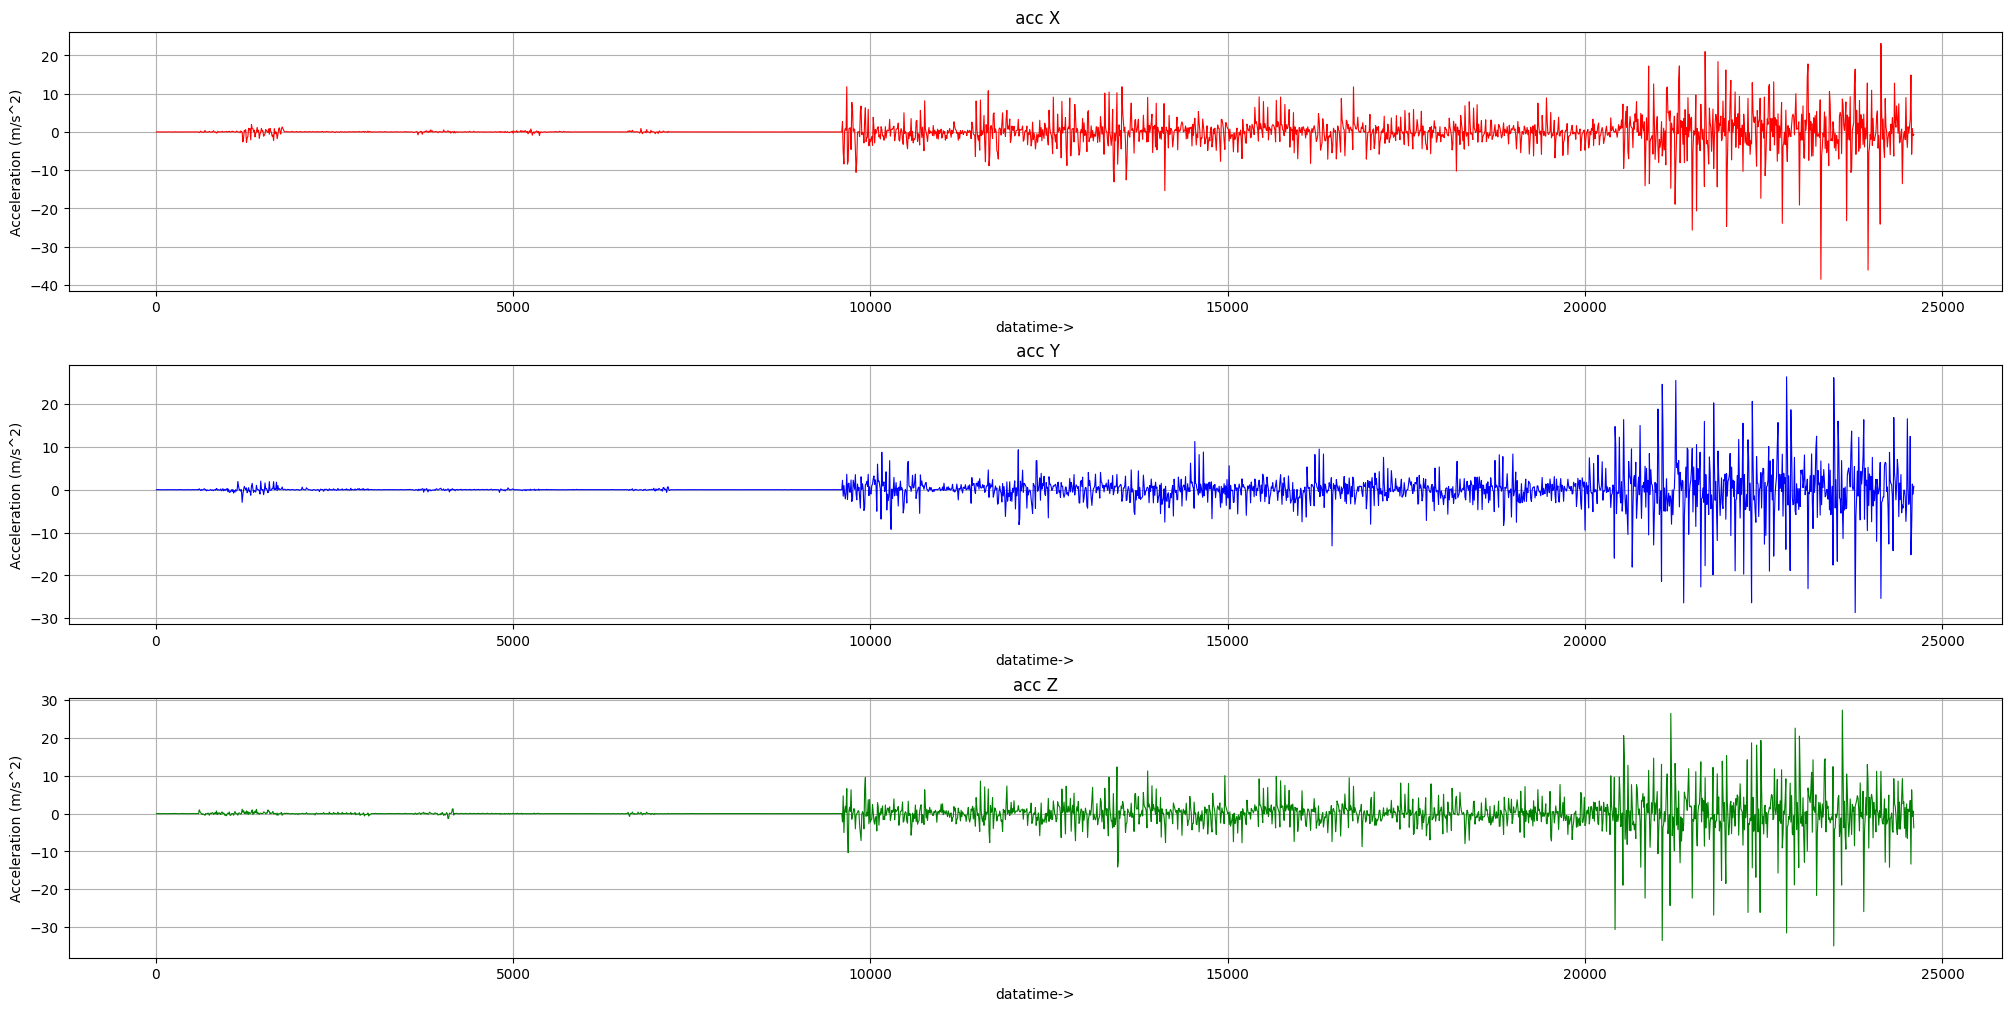

In [16]:
plot_fun_acc(sensor,tempo,True)